In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from lightgbm import LGBMClassifier, plot_importance
from sklearn.model_selection import train_test_split

In [2]:
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

mpl.rcParams['axes.unicode_minus'] = False
pd.set_option('display.max_columns', None)

In [20]:
df = pd.read_csv('./data_preprocessed_over.csv')

In [21]:
df["식전혈당"].value_counts()

2    924629
1    924629
0    924629
Name: 식전혈당, dtype: int64

In [22]:
target = df['식전혈당']
data = df.drop(['식전혈당'], axis=1)

parameters = {
    'objective': 'multiclass',
    'metric': 'multi_logloss',
    'boosting_type': 'gbdt',
    'learning_rate': 0.05,
    'n_estimators': 400
}

X_train , X_test, y_train , y_test = train_test_split(data, target, test_size=0.25, random_state=0, stratify=target)

evals= [(X_test, y_test)]
model = LGBMClassifier(**parameters)
model.fit(X_train, y_train ,early_stopping_rounds=100, eval_metric = 'logloss', eval_set= evals, verbose =True)

[1]	valid_0's multi_logloss: 1.08517
Training until validation scores don't improve for 100 rounds
[2]	valid_0's multi_logloss: 1.07307
[3]	valid_0's multi_logloss: 1.062
[4]	valid_0's multi_logloss: 1.05201
[5]	valid_0's multi_logloss: 1.04277
[6]	valid_0's multi_logloss: 1.03437
[7]	valid_0's multi_logloss: 1.02664
[8]	valid_0's multi_logloss: 1.01941
[9]	valid_0's multi_logloss: 1.01284
[10]	valid_0's multi_logloss: 1.00673
[11]	valid_0's multi_logloss: 1.00099
[12]	valid_0's multi_logloss: 0.995541
[13]	valid_0's multi_logloss: 0.990675
[14]	valid_0's multi_logloss: 0.986067
[15]	valid_0's multi_logloss: 0.981704
[16]	valid_0's multi_logloss: 0.977603
[17]	valid_0's multi_logloss: 0.97387
[18]	valid_0's multi_logloss: 0.970293
[19]	valid_0's multi_logloss: 0.966935
[20]	valid_0's multi_logloss: 0.963684
[21]	valid_0's multi_logloss: 0.960829
[22]	valid_0's multi_logloss: 0.95806
[23]	valid_0's multi_logloss: 0.955453
[24]	valid_0's multi_logloss: 0.952967
[25]	valid_0's multi_loglo

[208]	valid_0's multi_logloss: 0.882631
[209]	valid_0's multi_logloss: 0.882595
[210]	valid_0's multi_logloss: 0.882555
[211]	valid_0's multi_logloss: 0.882525
[212]	valid_0's multi_logloss: 0.88249
[213]	valid_0's multi_logloss: 0.882448
[214]	valid_0's multi_logloss: 0.882411
[215]	valid_0's multi_logloss: 0.882376
[216]	valid_0's multi_logloss: 0.882308
[217]	valid_0's multi_logloss: 0.882271
[218]	valid_0's multi_logloss: 0.882228
[219]	valid_0's multi_logloss: 0.882195
[220]	valid_0's multi_logloss: 0.882165
[221]	valid_0's multi_logloss: 0.882133
[222]	valid_0's multi_logloss: 0.882092
[223]	valid_0's multi_logloss: 0.882062
[224]	valid_0's multi_logloss: 0.882033
[225]	valid_0's multi_logloss: 0.881994
[226]	valid_0's multi_logloss: 0.881959
[227]	valid_0's multi_logloss: 0.881931
[228]	valid_0's multi_logloss: 0.881883
[229]	valid_0's multi_logloss: 0.881856
[230]	valid_0's multi_logloss: 0.881828
[231]	valid_0's multi_logloss: 0.881809
[232]	valid_0's multi_logloss: 0.881783
[

LGBMClassifier(learning_rate=0.05, metric='multi_logloss', n_estimators=400,
               objective='multiclass')

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

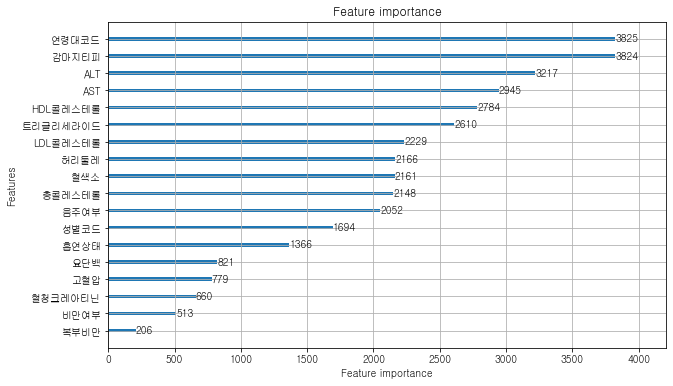

In [23]:
fig, ax = plt.subplots(figsize=(10,6))
plot_importance(model, ax = ax)

In [24]:
df = df[["연령대코드","감마지티피","ALT","AST","HDL콜레스테롤","식전혈당"]]

In [25]:
from sklearn.preprocessing import StandardScaler

target = df['식전혈당']
data = df.drop(['식전혈당'], axis=1)

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)


X_train , X_test, y_train , y_test = train_test_split(data_scaled, target, test_size=0.25, random_state=0, stratify=target)

In [ ]:
from sklearn.model_selection import KFold,GridSearchCV


# Create parameters to search
gridParams = {
    'learning_rate': [0.005, 0.05, 0.1],
    'num_iterations': [100, 500, 1000],
    'boosting' : ['gbdt','dart','rf','goss'],
    'metric': ['multi_logloss','multi_error'],
    'objective' : ['multiclass'],
    }

model = LGBMClassifier()

cv=KFold(n_splits=6, random_state=1, shuffle=True)


gcv=GridSearchCV(model, param_grid=gridParams, cv=cv, scoring='accuracy', n_jobs=-1)
gcv.fit(X_train, y_train)
print('final params', gcv.best_params_)   # 최적의 파라미터 값 출력
print('best score', gcv.best_score_)      # 최고의 점수

In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
# 모델 평가를 위한 함수 설정
def get_clf_eval(y_test, y_pred):
    confusion = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    #precision = precision_score(y_test, y_pred) 이진분류에서만 사용가능
    #recall = recall_score(y_test, y_pred)
    #F1 = f1_score(y_test, y_pred)
    #AUC = roc_auc_score(y_test, y_pred)
    # 평가지표 출력
    print('오차행렬:\n', confusion)
    print('\n정확도: {:.4f}'.format(accuracy))
    #print('정밀도: {:.4f}'.format(precision))
    #print('재현율: {:.4f}'.format(recall))
    #print('F1: {:.4f}'.format(F1))
    #print('AUC: {:.4f}'.format(AUC))

In [27]:
parameters = {
    'objective': 'multiclass',
    'metric': 'multi_logloss',
    'boosting': 'gbdt',
    'learning_rate': 0.05,
    'n_estimators': 200
}

evals= [(X_test, y_test)]
model = LGBMClassifier(**parameters)
model.fit(X_train, y_train ,early_stopping_rounds=100, eval_metric = 'logloss', eval_set= evals, verbose =True)
y_pred=model.predict(X_test)

[1]	valid_0's multi_logloss: 1.08847
Training until validation scores don't improve for 100 rounds
[2]	valid_0's multi_logloss: 1.0793
[3]	valid_0's multi_logloss: 1.07099
[4]	valid_0's multi_logloss: 1.06342
[5]	valid_0's multi_logloss: 1.05654
[6]	valid_0's multi_logloss: 1.05022
[7]	valid_0's multi_logloss: 1.04444
[8]	valid_0's multi_logloss: 1.03913
[9]	valid_0's multi_logloss: 1.03426
[10]	valid_0's multi_logloss: 1.02976
[11]	valid_0's multi_logloss: 1.0256
[12]	valid_0's multi_logloss: 1.0218
[13]	valid_0's multi_logloss: 1.01827
[14]	valid_0's multi_logloss: 1.01501
[15]	valid_0's multi_logloss: 1.012
[16]	valid_0's multi_logloss: 1.0092
[17]	valid_0's multi_logloss: 1.0066
[18]	valid_0's multi_logloss: 1.00419
[19]	valid_0's multi_logloss: 1.00192
[20]	valid_0's multi_logloss: 0.99984
[21]	valid_0's multi_logloss: 0.99788
[22]	valid_0's multi_logloss: 0.996079
[23]	valid_0's multi_logloss: 0.994385
[24]	valid_0's multi_logloss: 0.992766
[25]	valid_0's multi_logloss: 0.991282


In [29]:
get_clf_eval(y_test,y_pred)

오차행렬:
 [[132239  44583  54336]
 [ 75957  57995  97205]
 [ 25013  39249 166895]]

정확도: 0.5150


In [30]:
parameters = {
    'objective': 'multiclass',
    'metric': 'multi_logloss',
    'boosting_type': 'gbdt',
    'learning_rate': 0.1,
    'max_depth': 10,
}

evals= [(X_test, y_test)]
model = LGBMClassifier(**parameters)
model.fit(X_train, y_train ,early_stopping_rounds=100, eval_metric = 'logloss', eval_set= evals, verbose =True)
y_pred=model.predict(X_test)

[1]	valid_0's multi_logloss: 1.07884
Training until validation scores don't improve for 100 rounds
[2]	valid_0's multi_logloss: 1.06271
[3]	valid_0's multi_logloss: 1.04934
[4]	valid_0's multi_logloss: 1.03818
[5]	valid_0's multi_logloss: 1.02876
[6]	valid_0's multi_logloss: 1.02083
[7]	valid_0's multi_logloss: 1.0141
[8]	valid_0's multi_logloss: 1.00832
[9]	valid_0's multi_logloss: 1.00341
[10]	valid_0's multi_logloss: 0.999139
[11]	valid_0's multi_logloss: 0.995399
[12]	valid_0's multi_logloss: 0.99209
[13]	valid_0's multi_logloss: 0.98927
[14]	valid_0's multi_logloss: 0.986772
[15]	valid_0's multi_logloss: 0.984564
[16]	valid_0's multi_logloss: 0.98255
[17]	valid_0's multi_logloss: 0.980813
[18]	valid_0's multi_logloss: 0.979265
[19]	valid_0's multi_logloss: 0.97784
[20]	valid_0's multi_logloss: 0.976664
[21]	valid_0's multi_logloss: 0.975556
[22]	valid_0's multi_logloss: 0.974484
[23]	valid_0's multi_logloss: 0.973613
[24]	valid_0's multi_logloss: 0.972785
[25]	valid_0's multi_logl

In [31]:
get_clf_eval(y_test,y_pred)

오차행렬:
 [[132154  44756  54248]
 [ 75902  58154  97101]
 [ 24892  39408 166857]]

정확도: 0.5150


In [32]:
parameters = {
    'objective': 'multiclass',
    'metric': 'multi_logloss',
    'boosting_type': 'dart',
    'learning_rate': 0.1,
    'n_estimators': 200,
}

evals= [(X_test, y_test)]
model = LGBMClassifier(**parameters)
model.fit(X_train, y_train ,early_stopping_rounds=100, eval_metric = 'logloss', eval_set= evals, verbose =True)
y_pred=model.predict(X_test)

[1]	valid_0's multi_logloss: 1.07884


C:\Users\a\anaconda3\lib\site-packages\lightgbm\callback.py:183: UserWarning: Early stopping is not available in dart mode
  _log_warning('Early stopping is not available in dart mode')


[2]	valid_0's multi_logloss: 1.06271
[3]	valid_0's multi_logloss: 1.04934
[4]	valid_0's multi_logloss: 1.03818
[5]	valid_0's multi_logloss: 1.02876
[6]	valid_0's multi_logloss: 1.02083
[7]	valid_0's multi_logloss: 1.0141
[8]	valid_0's multi_logloss: 1.01725
[9]	valid_0's multi_logloss: 1.011
[10]	valid_0's multi_logloss: 1.00571
[11]	valid_0's multi_logloss: 1.00107
[12]	valid_0's multi_logloss: 1.00298
[13]	valid_0's multi_logloss: 0.998754
[14]	valid_0's multi_logloss: 0.9951
[15]	valid_0's multi_logloss: 0.991813
[16]	valid_0's multi_logloss: 0.989056
[17]	valid_0's multi_logloss: 0.986532
[18]	valid_0's multi_logloss: 0.984328
[19]	valid_0's multi_logloss: 0.982387
[20]	valid_0's multi_logloss: 0.980546
[21]	valid_0's multi_logloss: 0.98127
[22]	valid_0's multi_logloss: 0.979692
[23]	valid_0's multi_logloss: 0.97825
[24]	valid_0's multi_logloss: 0.976908
[25]	valid_0's multi_logloss: 0.975807
[26]	valid_0's multi_logloss: 0.974722
[27]	valid_0's multi_logloss: 0.973774
[28]	valid_0

In [33]:
get_clf_eval(y_test,y_pred)

오차행렬:
 [[133152  41702  56304]
 [ 76879  54305  99973]
 [ 25630  35797 169730]]

정확도: 0.5151


In [34]:
parameters = {
    'objective': 'multiclass',
    'metric': 'multi_error',
    'boosting_type': 'gbdt',
    'learning_rate': 0.1,
    'n_estimators': 200,
}

evals= [(X_test, y_test)]
model = LGBMClassifier(**parameters)
model.fit(X_train, y_train ,early_stopping_rounds=100, eval_metric = 'logloss', eval_set= evals, verbose =True)
y_pred=model.predict(X_test)

[1]	valid_0's multi_logloss: 1.07884	valid_0's multi_error: 0.501341
Training until validation scores don't improve for 100 rounds
[2]	valid_0's multi_logloss: 1.06271	valid_0's multi_error: 0.498878
[3]	valid_0's multi_logloss: 1.04934	valid_0's multi_error: 0.496683
[4]	valid_0's multi_logloss: 1.03818	valid_0's multi_error: 0.495582
[5]	valid_0's multi_logloss: 1.02876	valid_0's multi_error: 0.494245
[6]	valid_0's multi_logloss: 1.02083	valid_0's multi_error: 0.493886
[7]	valid_0's multi_logloss: 1.0141	valid_0's multi_error: 0.493357
[8]	valid_0's multi_logloss: 1.00832	valid_0's multi_error: 0.492679
[9]	valid_0's multi_logloss: 1.00341	valid_0's multi_error: 0.492308
[10]	valid_0's multi_logloss: 0.999139	valid_0's multi_error: 0.491867
[11]	valid_0's multi_logloss: 0.995399	valid_0's multi_error: 0.491273
[12]	valid_0's multi_logloss: 0.99209	valid_0's multi_error: 0.490706
[13]	valid_0's multi_logloss: 0.98927	valid_0's multi_error: 0.490173
[14]	valid_0's multi_logloss: 0.9867

[117]	valid_0's multi_logloss: 0.963562	valid_0's multi_error: 0.484622
[118]	valid_0's multi_logloss: 0.96355	valid_0's multi_error: 0.484628
[119]	valid_0's multi_logloss: 0.963545	valid_0's multi_error: 0.484624
[120]	valid_0's multi_logloss: 0.963537	valid_0's multi_error: 0.484619
[121]	valid_0's multi_logloss: 0.963532	valid_0's multi_error: 0.484628
[122]	valid_0's multi_logloss: 0.963524	valid_0's multi_error: 0.484638
[123]	valid_0's multi_logloss: 0.963519	valid_0's multi_error: 0.484645
[124]	valid_0's multi_logloss: 0.963515	valid_0's multi_error: 0.484666
[125]	valid_0's multi_logloss: 0.96351	valid_0's multi_error: 0.484663
[126]	valid_0's multi_logloss: 0.9635	valid_0's multi_error: 0.484661
[127]	valid_0's multi_logloss: 0.963492	valid_0's multi_error: 0.484677
[128]	valid_0's multi_logloss: 0.963486	valid_0's multi_error: 0.484673
[129]	valid_0's multi_logloss: 0.963481	valid_0's multi_error: 0.484663
[130]	valid_0's multi_logloss: 0.963473	valid_0's multi_error: 0.484

In [35]:
get_clf_eval(y_test,y_pred)

오차행렬:
 [[132385  44413  54360]
 [ 76035  57932  97190]
 [ 25018  39000 167139]]

정확도: 0.5155


In [40]:
parameters = {
    'objective': 'multiclass',
    'metric': 'multi_logloss',
    'boosting_type': 'goss',
    'learning_rate': 0.1,
    'n_estimators' : 200
}

evals= [(X_test, y_test)]
model = LGBMClassifier(**parameters)
model.fit(X_train, y_train ,early_stopping_rounds=100, eval_metric = 'logloss', eval_set= evals, verbose =True)
y_pred=model.predict(X_test)

[1]	valid_0's multi_logloss: 1.07884
Training until validation scores don't improve for 100 rounds
[2]	valid_0's multi_logloss: 1.06271
[3]	valid_0's multi_logloss: 1.04934
[4]	valid_0's multi_logloss: 1.03818
[5]	valid_0's multi_logloss: 1.02876
[6]	valid_0's multi_logloss: 1.02083
[7]	valid_0's multi_logloss: 1.0141
[8]	valid_0's multi_logloss: 1.00832
[9]	valid_0's multi_logloss: 1.00341
[10]	valid_0's multi_logloss: 0.999139
[11]	valid_0's multi_logloss: 0.995364
[12]	valid_0's multi_logloss: 0.992003
[13]	valid_0's multi_logloss: 0.989204
[14]	valid_0's multi_logloss: 0.986578
[15]	valid_0's multi_logloss: 0.9843
[16]	valid_0's multi_logloss: 0.982321
[17]	valid_0's multi_logloss: 0.98056
[18]	valid_0's multi_logloss: 0.978952
[19]	valid_0's multi_logloss: 0.977593
[20]	valid_0's multi_logloss: 0.976263
[21]	valid_0's multi_logloss: 0.975135
[22]	valid_0's multi_logloss: 0.974145
[23]	valid_0's multi_logloss: 0.973254
[24]	valid_0's multi_logloss: 0.972428
[25]	valid_0's multi_log

In [41]:
get_clf_eval(y_test,y_pred)

오차행렬:
 [[131431  45462  54265]
 [ 75298  58848  97011]
 [ 24645  39679 166833]]

정확도: 0.5150
